In [9]:
import tikzplotlib

In [10]:
'''
Demonstrates displaying a 3D surface while also projecting filled contour
'profiles' onto the 'walls' of the graph.

See contour3d_demo2 for the unfilled version.
'''

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm


In [11]:
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                 mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

In [33]:
num_contours = 8
offset = -2
u = 3
width = 3.3
if u == 0: # lowest level set
    lw = (0,width,0,0,0,0,0,0,0,0)
    lw1 = (0,1.5,0,0,0,0,0,0)
    E_level = -1.2
elif u == 1: # mid
    lw = (0,0,width,0,0,0,0,0,0,0)
    lw1 = (0,0,1.5,0,0,0,0,0)
    E_level = -0.8
elif u == 2: # mid
    lw = (0,0,0,0,width,0,0,0,0,0)
    lw1 = (0,0,0,0,1.5,0,0,0)
    E_level = 0
else:
    lw = (0,0,0,0,0,width,0,0)
    lw1 = (0,0,0,0,0,1.5,0,0)
    E_level = -1.2
fs = 28

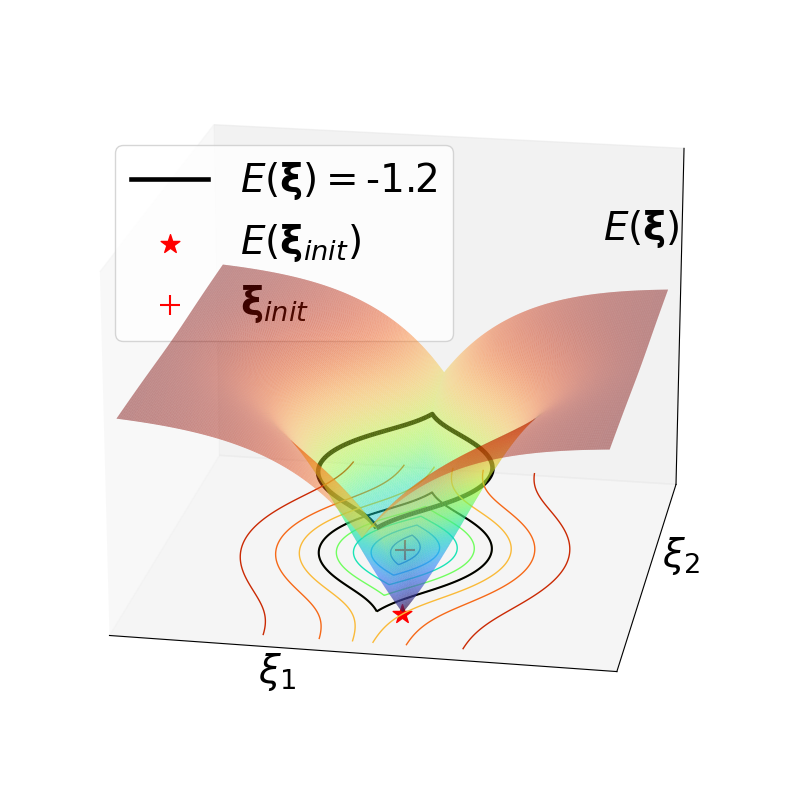

In [46]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
# Z2 = bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z3 = -1/np.exp(np.abs(X))
# Z3 = -(np.exp(np.abs(X))-1)-(np.exp(np.abs(Y))-1)
Z = 10.0 * (-1*Z1) + 1 * Z3
# Z = 10.0 * (Z2 - Z1) + 0.03 * Z3
# print(X.shape, Y.shape, Z.shape)

ax.plot_surface(X, Y, Z, cmap=cm.turbo, lw=0.5, rstride=1, cstride=1, alpha=0.5) # surface
contour = ax.contour(X, Y, Z, num_contours, linewidths=lw, colors="k", linestyles="solid") # black level set
ax.contour(X, Y, Z, num_contours, linewidths=1, cmap=cm.turbo, linestyles="solid", offset=offset) # bottom contour
ax.contour(X, Y, Z, num_contours, linewidths=lw1, colors="k", linestyles="solid", offset=offset) # bottom contour, black
ax.plot(x+100, y+100, c='black', label=r'$E(\mathbf{\xi})=$'+str(E_level), linewidth=width) # fake plot to retrieve legend
ax.scatter(-0.04,-0,-2.65, c='red', s=200, marker='*', label=r'$E({\mathbf{\xi}}_{init})$') # E(eps_s)
ax.scatter(0,-0,offset, c='red', s=200, marker='+', label=r'${\mathbf{\xi}}_{init}$') # eps_s

ax.view_init(20, -80)
plt.legend(bbox_to_anchor=(0.6, 0.85), fontsize=fs)
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.axes.set_xlim3d(left=-3, right=3)
ax.axes.set_ylim3d(bottom=-3, top=3)
ax.axes.set_zlim3d(bottom=offset, top=1.25)
ax.text(-1,-4.4, -2, r'$\xi_1$', fontsize=fs)
ax.text(3.3, 0, -2, r'$\xi_2$', fontsize=fs)
ax.text(2.1, 3, 0.4, r'$E(\mathbf{\xi})$', fontsize=fs)
# ax.set_xlabel(r'$\epsilon_1$', rotation=90)
# ax.set_ylabel(r'$\epsilon_2$', rotation=45)
# ax.set_zlabel(r'$E(\mathbf{\epsilon})$', rotation=0)
# plt.title('Energy function of the C-space')
plt.savefig("illu-3d.png", dpi=300)
# tikzplotlib.save("ICRAfigure3.tex")
plt.show()

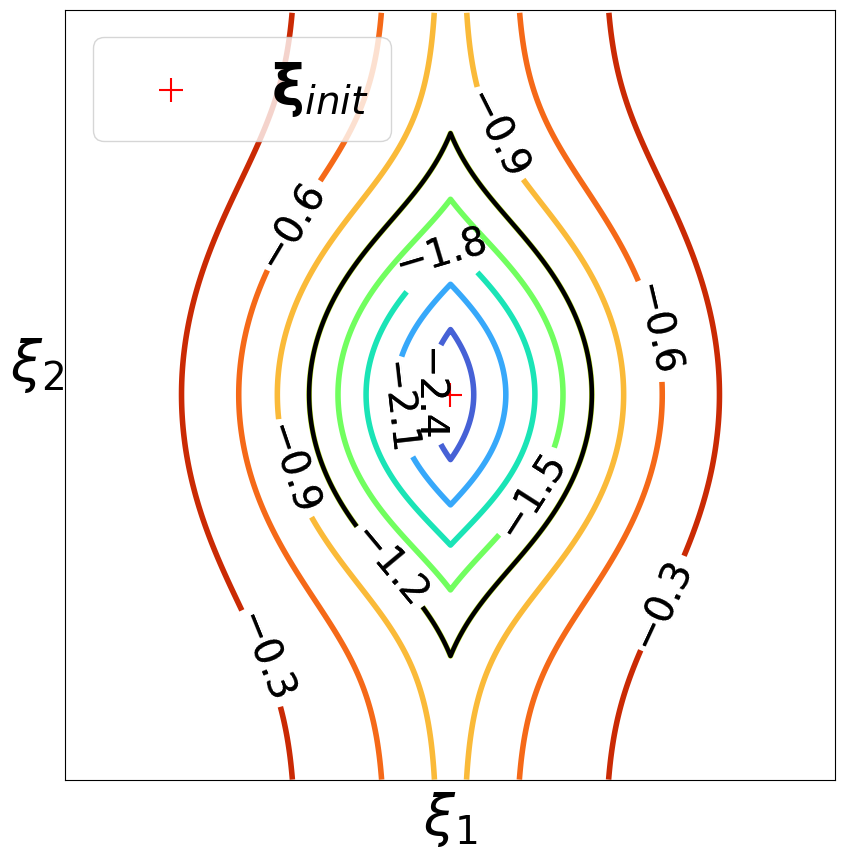

In [57]:
plt.figure(figsize=(10, 10))
CS = plt.contour(X, Y, Z, num_contours, cmap=cm.turbo, linewidths=4, )
CS1 = plt.contour(X, Y, Z, num_contours, linewidths=lw, colors="k", linestyles="solid")
plt.clabel(CS1, inline=1, fontsize=fs, colors="k",)
plt.clabel(CS, inline=1, fontsize=fs, colors="k",)
plt.scatter(0,-0, c='red', s=300, marker='+', label=r'${\mathbf{\xi}}_{init}$') # eps_s
# plt.plot(x+100, y+100, c='black', label=r'$E(\mathbf{\xi})=$'+str(E_level), linewidth=width) # fake plot to retrieve legend

plt.legend(loc='upper left', fontsize=fs+12)
plt.axis('equal')
plt.axis('square')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.xticks([])
plt.yticks([])
plt.xlabel(r'$\xi_1$', rotation=0, fontsize=fs+12)
plt.ylabel(r'$\xi_2$', rotation=0, labelpad=17, fontsize=fs+12)
# plt.title('Contour plot of the energy function')
plt.savefig("illu-2dcontour.png", dpi=300)


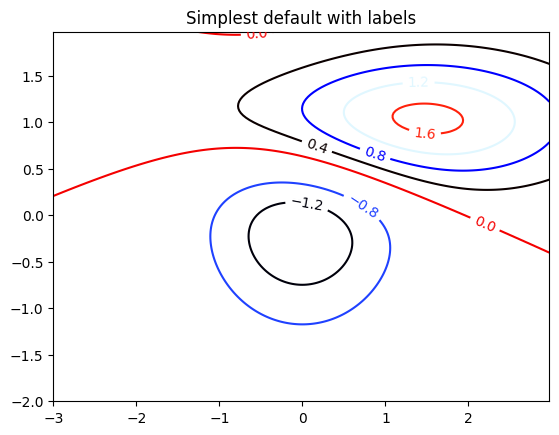

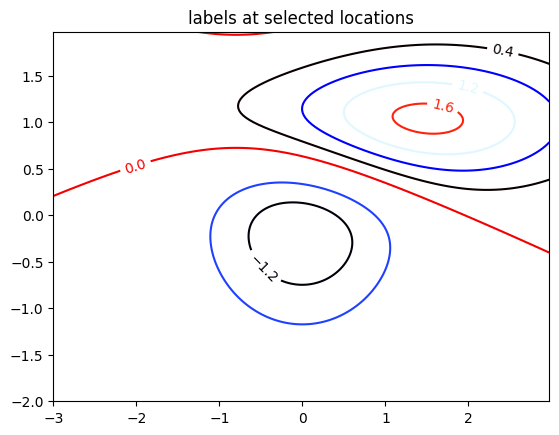

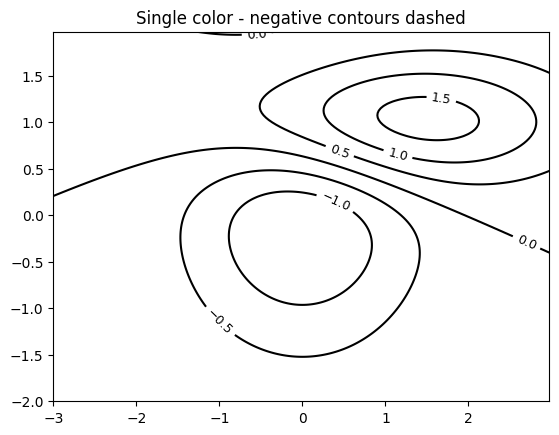

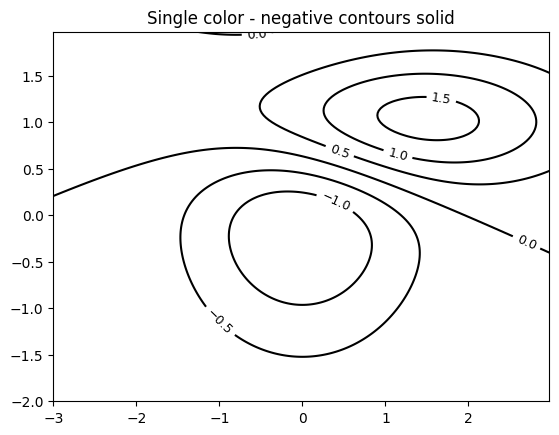

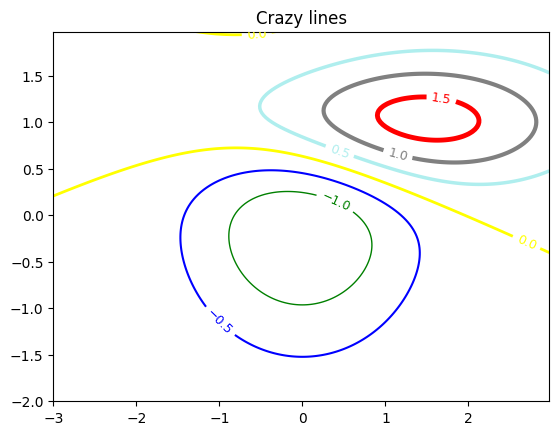

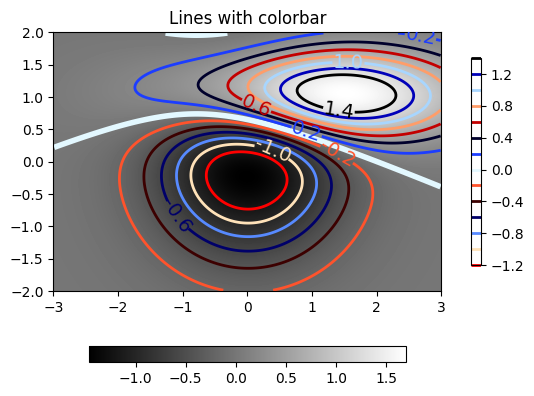

In [ ]:
"""
Illustrate simple contour plotting, contours on an image with
a colorbar for the contours, and labelled contours.

See also contour_image.py.
"""
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)


# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')


# # contour labels can be placed manually by providing list of positions
# # (in data coordinate). See ginput_manual_clabel.py for interactive
# # placement.
# plt.figure()
# CS = plt.contour(X, Y, Z)
# manual_locations = [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
# plt.clabel(CS, inline=1, fontsize=10, manual=manual_locations)
# plt.title('labels at selected locations')


# # You can force all the contours to be the same color.
# plt.figure()
# CS = plt.contour(X, Y, Z, 6,
#                  colors='k',  # negative contours will be dashed by default
#                  )
# plt.clabel(CS, fontsize=9, inline=1)
# plt.title('Single color - negative contours dashed')

# # You can set negative contours to be solid instead of dashed:
# matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
# plt.figure()
# CS = plt.contour(X, Y, Z, 6,
#                  colors='k',  # negative contours will be dashed by default
#                  )
# plt.clabel(CS, fontsize=9, inline=1)
# plt.title('Single color - negative contours solid')


# # And you can manually specify the colors of the contour
# plt.figure()
# CS = plt.contour(X, Y, Z, 6,
#                  linewidths=np.arange(.5, 4, .5),
#                  colors=('r', 'green', 'blue', (1, 1, 0), '#afeeee', '0.5')
#                  )
# plt.clabel(CS, fontsize=9, inline=1)
# plt.title('Crazy lines')


# # Or you can use a colormap to specify the colors; the default
# # colormap will be used for the contour lines
# plt.figure()
# im = plt.imshow(Z, interpolation='bilinear', origin='lower',
#                 cmap=cm.gray, extent=(-3, 3, -2, 2))
# levels = np.arange(-1.2, 1.6, 0.2)
# CS = plt.contour(Z, levels,
#                  origin='lower',
#                  linewidths=2,
#                  extent=(-3, 3, -2, 2))

# # Thicken the zero contour.
# zc = CS.collections[6]
# plt.setp(zc, linewidth=4)

# plt.clabel(CS, levels[1::2],  # label every second level
#            inline=1,
#            fmt='%1.1f',
#            fontsize=14)

# # make a colorbar for the contour lines
# CB = plt.colorbar(CS, shrink=0.8, extend='both')

# plt.title('Lines with colorbar')
# #plt.hot()  # Now change the colormap for the contour lines and colorbar
# plt.flag()

# # We can still add a colorbar for the image, too.
# CBI = plt.colorbar(im, orientation='horizontal', shrink=0.8)

# # This makes the original colorbar look a bit out of place,
# # so let's improve its position.

# l, b, w, h = plt.gca().get_position().bounds
# ll, bb, ww, hh = CB.ax.get_position().bounds
# CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])


plt.show()